<a href="https://colab.research.google.com/github/LTRibeiros/AnaliseDeDados_Python/blob/main/laboratorio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [3]:
df = pd.read_csv("/content/drive/MyDrive/housing.csv")

Dicionário:

RM: é o número médio de cômodos entre os imóveis no bairro.

LSTAT: é a porcentagem de proprietários no bairro considerados de "classe baixa" (proletariado).

PTRATIO: é a razão entre estudantes e professores nas escolas de ensino fundamental e médio no bairro.

MEDV: valor médio das casas

In [6]:
df.head(10)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
5,6.430,5.21,18.7,602700.0
6,6.012,12.43,15.2,480900.0
7,6.172,19.15,15.2,569100.0
8,5.631,29.93,15.2,346500.0
9,6.004,17.10,15.2,396900.0


#1)

In [4]:
desc = df[['RM', 'MEDV']].describe().T
desc['moda'] = [df['RM'].mode()[0], df['MEDV'].mode()[0]]
print("Estatística descritiva:\n", desc)


Estatística descritiva:
       count           mean            std         min        25%         50%  \
RM    489.0       6.240288       0.643650       3.561       5.88       6.185   
MEDV  489.0  454342.944785  165340.277653  105000.000  350700.00  438900.000   

             75%          max        moda  
RM         6.575        8.398       5.713  
MEDV  518700.000  1024800.000  525000.000  


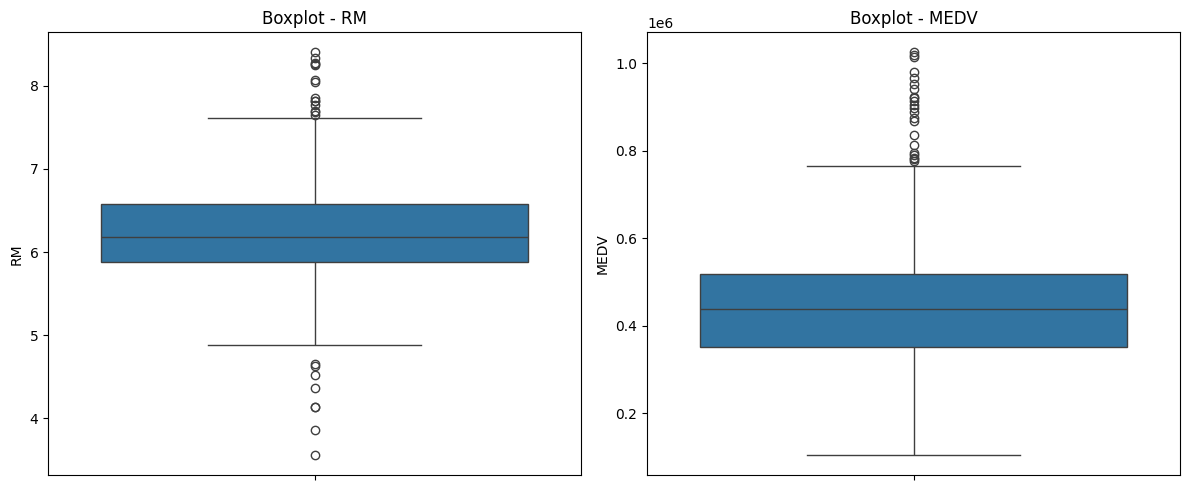

In [5]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['RM'])
plt.title("Boxplot - RM")
plt.subplot(1, 2, 2)
sns.boxplot(y=df['MEDV'])
plt.title("Boxplot - MEDV")
plt.tight_layout()
plt.show()


possuem outliers

# 2)

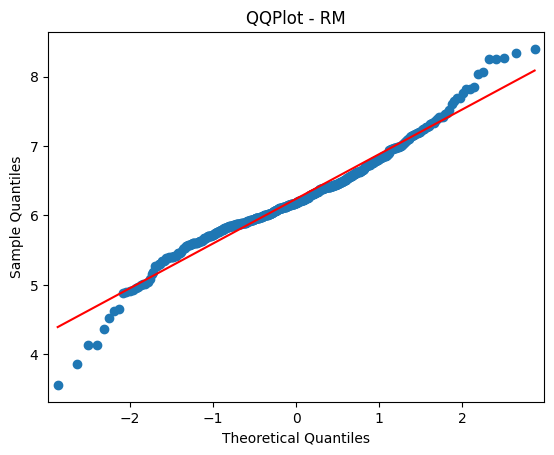

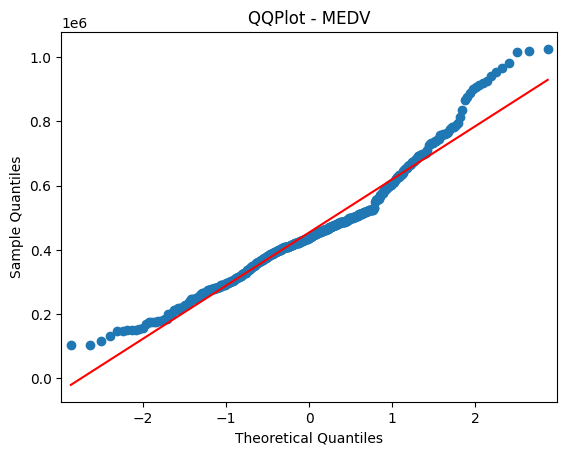

In [7]:
sm.qqplot(df['RM'], line='s')
plt.title('QQPlot - RM')
plt.show()
sm.qqplot(df['MEDV'], line='s')
plt.title('QQPlot - MEDV')
plt.show()


In [8]:
shapiro_rm = stats.shapiro(df['RM'])
shapiro_medv = stats.shapiro(df['MEDV'])
print("Shapiro-Wilk RM:", shapiro_rm)
print("Shapiro-Wilk MEDV:", shapiro_medv)


Shapiro-Wilk RM: ShapiroResult(statistic=np.float64(0.9708170375303297), pvalue=np.float64(2.7090145811327798e-08))
Shapiro-Wilk MEDV: ShapiroResult(statistic=np.float64(0.9596616055953767), pvalue=np.float64(2.5759801704018553e-10))


rejeitamos H0, pois os p < 0.05, os gráficos não possuem distribuição normal

#3) O coeficiente de Pearson é mais adequado, pois as variaveis sao quantitativas e continuas

#4)

In [9]:
corr_pearson = df[['RM', 'MEDV']].corr(method='pearson')
print("Correlação de Pearson:\n", corr_pearson)


Correlação de Pearson:
             RM      MEDV
RM    1.000000  0.697209
MEDV  0.697209  1.000000


é uma correlação forte (x >0.6 e x <0.9)

#5)

In [10]:
X = df[['RM']]
y = df['MEDV']
modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)
r2 = r2_score(y, y_pred)
print(f"Coeficiente de determinação (R²): {r2:.4f}")


Coeficiente de determinação (R²): 0.4861


isso significa há aproximadamente 48.35% da variabilidade da media de MEDV para RM no modelo de regressão linear

#6)

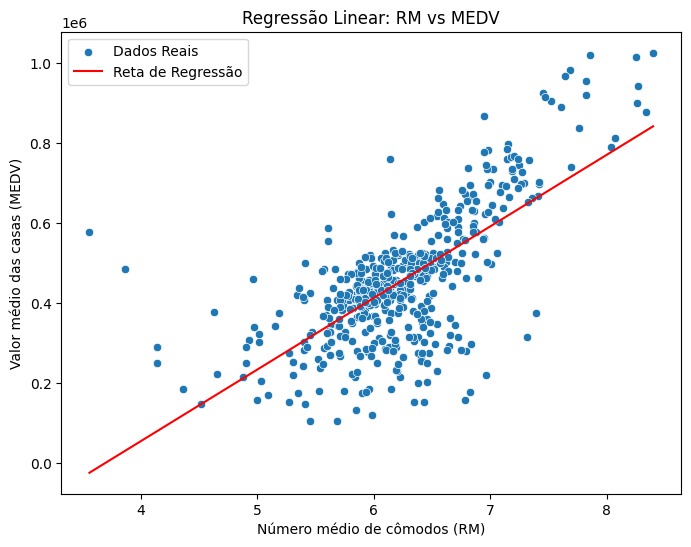

In [11]:

# Gráfico da regressão
plt.figure(figsize=(8, 6))
sns.scatterplot(x='RM', y='MEDV', data=df, label='Dados Reais')
sns.lineplot(x=df['RM'], y=y_pred, color='red', label='Reta de Regressão')
plt.title('Regressão Linear: RM vs MEDV')
plt.xlabel('Número médio de cômodos (RM)')
plt.ylabel('Valor médio das casas (MEDV)')
plt.legend()
plt.show()


#7)

In [12]:
# Equação da regressão
coef_angular = modelo.coef_[0]
intercepto = modelo.intercept_
print(f"Equação do modelo: MEDV = {intercepto:.2f} + {coef_angular:.2f} * RM")


Equação do modelo: MEDV = -663283.91 + 179098.59 * RM


#8)

In [13]:
# Previsão para 11 cômodos
rm_novo = np.array([[11]])
medv_previsto = modelo.predict(rm_novo)
print(f"Valor previsto para uma casa com 11 cômodos: ${medv_previsto[0]:.2f}")

Valor previsto para uma casa com 11 cômodos: $1306800.60


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#9)

In [14]:
# Teste de hipótese (média entre RM 6~7 e geral
# Amostra 1: RM entre 6 e 7
amostra_rm_6_7 = df[(df['RM'] >= 6) & (df['RM'] <= 7)]['MEDV']

# Amostra 2: Todas as casas
amostra_total = df['MEDV']

# Teste t de uma amostra (comparando média da amostra com a média populacional)
t_stat, p_value = stats.ttest_1samp(amostra_rm_6_7, amostra_total.mean())

print("Estatística t:", t_stat)
print("Valor-p:", p_value)

# Nível de significância de 0.01
if p_value < 0.01:
    print("Rejeitamos H0: Existe diferença significativa entre as médias.")
else:
    print("Não rejeitamos H0: Não há evidências de diferença significativa.")


Estatística t: 0.46428627866494093
Valor-p: 0.6428224114900971
Não rejeitamos H0: Não há evidências de diferença significativa.


usando teste t de uma amostra, H0 não é rejeitado com um nivel de significancia de 0.01